### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [3]:
### Data Collection
import pandas_datareader as pdr
key=""

In [7]:
df = pdr.get_data_tiingo('AAPL', api_key='c94be5b7daeb73731044dfe9e21c3cab60e624c7')
df.tail()

close     high     low    open     volume  \
symbol date                                                                     
AAPL   2020-09-14 00:00:00+00:00  115.355  115.930  112.80  114.72  140150087   
       2020-09-15 00:00:00+00:00  115.540  118.829  113.61  118.33  184642039   
       2020-09-16 00:00:00+00:00  112.130  116.000  112.04  115.23  155026675   
       2020-09-17 00:00:00+00:00  110.340  112.200  108.71  109.72  178010968   
       2020-09-18 00:00:00+00:00  106.840  110.880  106.09  110.40  287104882   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
AAPL   2020-09-14 00:00:00+00:00   115.355  115.930  112.80   114.72   
       2020-09-15 00:00:00+00:00   115.540  118.829  113.61   118.33   
       2020-09-16 00:00:00+00:00   112.130  116.000  112.04   115.23   
       2020-09-17 00:00:00+00:00   110.340  112.200  108.71   109.72   
       2020-09-18 00:00:00+00:00   106.840  110.880  106.09   110.40   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2020-09-14 00:00:00+00:00  140150087      0.0          1.0  
       2020-09-15 00:00:00+00:00  184642039      0.0          1.0  
       2020-09-16 00:00:00+00:00  155026675      0.0          1.0  
       2020-09-17 00:00:00+00:00  178010968      0.0          1.0  
       2020-09-18 00:00:00+00:00  287104882      0.0          1.0

In [8]:
df.to_csv('AAPL.csv')

In [9]:
import pandas as pd

In [10]:
df=pd.read_csv('AAPL.csv')

In [11]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-09-22 00:00:00+00:00,113.40,114.18,112.5201,113.38,50346159,26.194857,26.375034,25.991605,26.190238,201384636,0.0,1.0
1,AAPL,2015-09-23 00:00:00+00:00,114.32,114.72,113.3000,113.63,35756716,26.407373,26.499771,26.171758,26.247986,143026864,0.0,1.0
2,AAPL,2015-09-24 00:00:00+00:00,115.00,115.50,112.3700,113.25,50219475,26.564450,26.679947,25.956932,26.160208,200877900,0.0,1.0
3,AAPL,2015-09-25 00:00:00+00:00,114.71,116.69,114.0200,116.44,56151926,26.497461,26.954832,26.338074,26.897083,224607704,0.0,1.0
4,AAPL,2015-09-28 00:00:00+00:00,112.44,114.57,112.4400,113.85,50782189,25.973102,26.465122,25.973102,26.298805,203128756,0.0,1.0


In [12]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-09-14 00:00:00+00:00,115.355,115.930,112.80,114.72,140150087,115.355,115.930,112.80,114.72,140150087,0.0,1.0
1254,AAPL,2020-09-15 00:00:00+00:00,115.540,118.829,113.61,118.33,184642039,115.540,118.829,113.61,118.33,184642039,0.0,1.0
1255,AAPL,2020-09-16 00:00:00+00:00,112.130,116.000,112.04,115.23,155026675,112.130,116.000,112.04,115.23,155026675,0.0,1.0
1256,AAPL,2020-09-17 00:00:00+00:00,110.340,112.200,108.71,109.72,178010968,110.340,112.200,108.71,109.72,178010968,0.0,1.0
1257,AAPL,2020-09-18 00:00:00+00:00,106.840,110.880,106.09,110.40,287104882,106.840,110.880,106.09,110.40,287104882,0.0,1.0


In [13]:
df1=df.reset_index()['close']

In [16]:
df1

0       113.400
1       114.320
2       115.000
3       114.710
4       112.440
         ...   
1253    115.355
1254    115.540
1255    112.130
1256    110.340
1257    106.840
Name: close, Length: 1258, dtype: float64

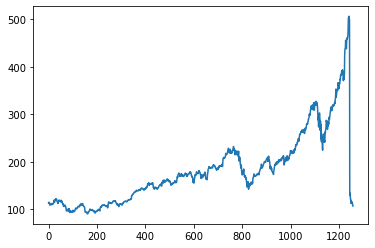

In [17]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [18]:
import numpy as np

In [19]:
df1

0       113.400
1       114.320
2       115.000
3       114.710
4       112.440
         ...   
1253    115.355
1254    115.540
1255    112.130
1256    110.340
1257    106.840
Name: close, Length: 1258, dtype: float64

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
#https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape

In [22]:
print(df1)

[[0.05546603]
 [0.05767889]
 [0.05931449]
 ...
 [0.0524113 ]
 [0.04810583]
 [0.03968731]]


In [23]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
training_size,test_size

(817, 441)

In [25]:
train_data

array([[0.05546603],
       [0.05767889],
       [0.05931449],
       [0.05861696],
       [0.05315695],
       [0.04502706],
       [0.04716777],
       [0.04627781],
       [0.04820204],
       [0.04916416],
       [0.05043897],
       [0.04916416],
       [0.04608539],
       [0.05238725],
       [0.0511365 ],
       [0.05159351],
       [0.04779314],
       [0.05176188],
       [0.04978954],
       [0.05144919],
       [0.05635598],
       [0.05633193],
       [0.06051714],
       [0.06912808],
       [0.05998797],
       [0.05823211],
       [0.06958509],
       [0.07261575],
       [0.0701383 ],
       [0.07417919],
       [0.07752255],
       [0.07615153],
       [0.07355382],
       [0.07389056],
       [0.07271197],
       [0.06357186],
       [0.06198437],
       [0.0610463 ],
       [0.05291642],
       [0.05733013],
       [0.05616356],
       [0.06482261],
       [0.06840649],
       [0.06965725],
       [0.06592904],
       [0.06864702],
       [0.06660253],
       [0.066

In [26]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [27]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [29]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [30]:
X_train

array([[0.05546603, 0.05767889, 0.05931449, ..., 0.0094528 , 0.00808178,
        0.00877931],
       [0.05767889, 0.05931449, 0.05861696, ..., 0.00808178, 0.00877931,
        0.01515334],
       [0.05931449, 0.05861696, 0.05315695, ..., 0.00877931, 0.01515334,
        0.01871317],
       ...,
       [0.24358388, 0.24692724, 0.25130487, ..., 0.19064342, 0.18831028,
        0.18944077],
       [0.24692724, 0.25130487, 0.24983764, ..., 0.18831028, 0.18944077,
        0.19389056],
       [0.25130487, 0.24983764, 0.24206855, ..., 0.18944077, 0.19389056,
        0.18073361]])

In [31]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 470ms/step - loss: 0.0091 - val_loss: 0.0583
Epoch 2/100
12/12 [==============================] - 4s 304ms/step - loss: 0.0019 - val_loss: 0.0201
Epoch 3/100
12/12 [==============================] - 4s 357ms/step - loss: 6.0881e-04 - val_loss: 0.0218
Epoch 4/100
12/12 [==============================] - 5s 450ms/step - loss: 4.5861e-04 - val_loss: 0.0193
Epoch 5/100
12/12 [==============================] - 6s 467ms/step - loss: 3.6783e-04 - val_loss: 0.0190
Epoch 6/100
12/12 [==============================] - 5s 425ms/step - loss: 3.6846e-04 - val_loss: 0.0188
Epoch 7/100
12/12 [==============================] - 4s 333ms/step - loss: 3.2985e-04 - val_loss: 0.0187
Epoch 8/100
12/12 [==============================] - 5s 400ms/step - loss: 3.1813e-04 - val_loss: 0.0183
Epoch 9/100
12/12 [==============================] - 4s 354ms/step - loss: 3.1088e-04 - val_loss: 0.0180
Epoch 10/100
12/12 [==============================] - 4s 369ms/

12/12 [==============================] - 4s 322ms/step - loss: 1.0026e-04 - val_loss: 0.0108
Epoch 79/100
12/12 [==============================] - 4s 309ms/step - loss: 1.1083e-04 - val_loss: 0.0110
Epoch 80/100
12/12 [==============================] - 4s 310ms/step - loss: 1.1669e-04 - val_loss: 0.0104
Epoch 81/100
12/12 [==============================] - 4s 307ms/step - loss: 1.1038e-04 - val_loss: 0.0106-0
Epoch 82/100
12/12 [==============================] - 4s 302ms/step - loss: 1.2238e-04 - val_loss: 0.0121
Epoch 83/100
12/12 [==============================] - 4s 302ms/step - loss: 1.2148e-04 - val_loss: 0.0102
Epoch 84/100
12/12 [==============================] - 4s 303ms/step - loss: 1.2114e-04 - val_loss: 0.0100
Epoch 85/100
12/12 [==============================] - 4s 304ms/step - loss: 1.1256e-04 - val_loss: 0.0096
Epoch 86/100
12/12 [==============================] - 4s 304ms/step - loss: 1.0548e-04 - val_loss: 0.0090
Epoch 87/100
12/12 [==============================] - 4s 

In [37]:
import tensorflow as tf

In [38]:
tf.__version__

'2.2.0'

In [39]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [40]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [41]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.00893636841324466

In [42]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.09075825396392252

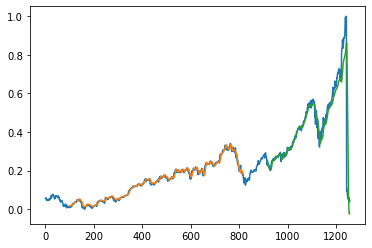

In [43]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
len(test_data)

441

In [45]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input

[0.47478051713770303,
 0.48938063740228505,
 0.4780036079374624,
 0.4878412507516537,
 0.49842453397474445,
 0.5058087793144919,
 0.5132892363199038,
 0.5286590499098016,
 0.5403968731208659,
 0.5317378232110643,
 0.5226939266386048,
 0.5272399278412507,
 0.5228382441371016,
 0.5402766085387853,
 0.5358989777510523,
 0.5505472038484667,
 0.5448226097414313,
 0.5497294046903187,
 0.5445339747444378,
 0.5478532772098617,
 0.5481900180396873,
 0.5474443776307878,
 0.5568490679494889,
 0.5604329524954901,
 0.5647143716175587,
 0.5579795550210462,
 0.5800601322910404,
 0.584774503908599,
 0.6101022248947685,
 0.6313890559230306,
 0.5906434155141311,
 0.5976187612748045,
 0.607696933253157,
 0.6295610342754059,
 0.6283824413710162,
 0.628719182200842,
 0.6238845460012028,
 0.6458929645219482,
 0.6643174984966926,
 0.6487552615754661,
 0.6602525556223691,
 0.6332892363199039,
 0.6528923631990378,
 0.6601563439567049,
 0.6584966927239928,
 0.6584966927239928,
 0.6819242333132893,
 0.6791340950

In [48]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[-0.01071456]
101
1 day input [ 0.48938064  0.47800361  0.48784125  0.49842453  0.50580878  0.51328924
  0.52865905  0.54039687  0.53173782  0.52269393  0.52723993  0.52283824
  0.54027661  0.53589898  0.5505472   0.54482261  0.5497294   0.54453397
  0.54785328  0.54819002  0.54744438  0.55684907  0.56043295  0.56471437
  0.55797956  0.58006013  0.5847745   0.61010222  0.63138906  0.59064342
  0.59761876  0.60769693  0.62956103  0.62838244  0.62871918  0.62388455
  0.64589296  0.6643175   0.64875526  0.66025256  0.63328924  0.65289236
  0.66015634  0.65849669  0.65849669  0.68192423  0.6791341   0.70001203
  0.7039567   0.70556825  0.70131088  0.71651233  0.72293446  0.711365
  0.70948888  0.72901984  0.71595911  0.71858088  0.67598316  0.67377029
  0.69488876  0.67990379  0.69710162  0.70816597  0.80505111  0.83081179
  0.83781118  0.8416356   0.87858088  0.85173782  0.86727601  0.83502105
  0.86999399  0.88923632  0.88825015  0.8853638   0.89455201  0.89594708
  0.92064943  0.9792904

8 day output [[-0.09682846]]
9 day input [ 0.53173782  0.52269393  0.52723993  0.52283824  0.54027661  0.53589898
  0.5505472   0.54482261  0.5497294   0.54453397  0.54785328  0.54819002
  0.54744438  0.55684907  0.56043295  0.56471437  0.55797956  0.58006013
  0.5847745   0.61010222  0.63138906  0.59064342  0.59761876  0.60769693
  0.62956103  0.62838244  0.62871918  0.62388455  0.64589296  0.6643175
  0.64875526  0.66025256  0.63328924  0.65289236  0.66015634  0.65849669
  0.65849669  0.68192423  0.6791341   0.70001203  0.7039567   0.70556825
  0.70131088  0.71651233  0.72293446  0.711365    0.70948888  0.72901984
  0.71595911  0.71858088  0.67598316  0.67377029  0.69488876  0.67990379
  0.69710162  0.70816597  0.80505111  0.83081179  0.83781118  0.8416356
  0.87858088  0.85173782  0.86727601  0.83502105  0.86999399  0.88923632
  0.88825015  0.8853638   0.89455201  0.89594708  0.92064943  0.97929044
  0.99360192  0.98366807  1.          0.98544799  0.9834997   0.09308479
  0.10544799

17 day output [[-0.13459854]]
18 day input [ 0.54453397  0.54785328  0.54819002  0.54744438  0.55684907  0.56043295
  0.56471437  0.55797956  0.58006013  0.5847745   0.61010222  0.63138906
  0.59064342  0.59761876  0.60769693  0.62956103  0.62838244  0.62871918
  0.62388455  0.64589296  0.6643175   0.64875526  0.66025256  0.63328924
  0.65289236  0.66015634  0.65849669  0.65849669  0.68192423  0.6791341
  0.70001203  0.7039567   0.70556825  0.70131088  0.71651233  0.72293446
  0.711365    0.70948888  0.72901984  0.71595911  0.71858088  0.67598316
  0.67377029  0.69488876  0.67990379  0.69710162  0.70816597  0.80505111
  0.83081179  0.83781118  0.8416356   0.87858088  0.85173782  0.86727601
  0.83502105  0.86999399  0.88923632  0.88825015  0.8853638   0.89455201
  0.89594708  0.92064943  0.97929044  0.99360192  0.98366807  1.
  0.98544799  0.9834997   0.09308479  0.10544799  0.09876127  0.07345761
  0.07365003  0.05407096  0.06489477  0.0556825   0.05209862  0.06016837
  0.06061335  0.0

25 day output [[-0.1199303]]
26 day input [ 0.58006013  0.5847745   0.61010222  0.63138906  0.59064342  0.59761876
  0.60769693  0.62956103  0.62838244  0.62871918  0.62388455  0.64589296
  0.6643175   0.64875526  0.66025256  0.63328924  0.65289236  0.66015634
  0.65849669  0.65849669  0.68192423  0.6791341   0.70001203  0.7039567
  0.70556825  0.70131088  0.71651233  0.72293446  0.711365    0.70948888
  0.72901984  0.71595911  0.71858088  0.67598316  0.67377029  0.69488876
  0.67990379  0.69710162  0.70816597  0.80505111  0.83081179  0.83781118
  0.8416356   0.87858088  0.85173782  0.86727601  0.83502105  0.86999399
  0.88923632  0.88825015  0.8853638   0.89455201  0.89594708  0.92064943
  0.97929044  0.99360192  0.98366807  1.          0.98544799  0.9834997
  0.09308479  0.10544799  0.09876127  0.07345761  0.07365003  0.05407096
  0.06489477  0.0556825   0.05209862  0.06016837  0.06061335  0.0524113
  0.04810583  0.03968731 -0.01071456 -0.01101164 -0.01751553 -0.02853667
 -0.04214763

In [49]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [50]:
import matplotlib.pyplot as plt

In [53]:
len(df1)

1258

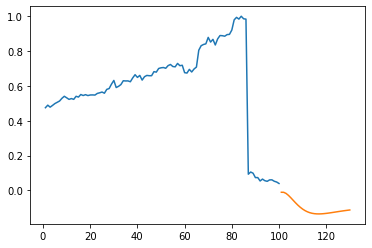

In [54]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

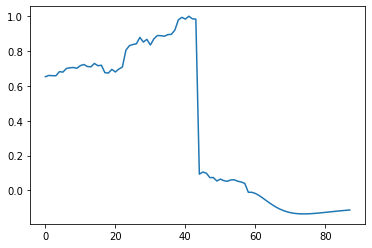

In [55]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [56]:
df3=scaler.inverse_transform(df3).tolist()

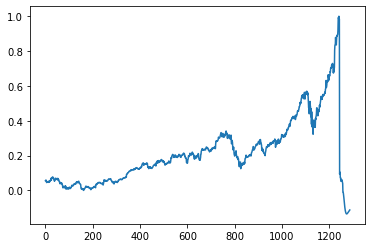

In [57]:
plt.plot(df3)